In [11]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG16
from tensorboard import notebook
from tensorflow import keras 
from tensorflow.keras.applications.resnet import ResNet50
from keras import models, layers
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory
sys.path.append("/root/autodl-tmp/model/CapsuleNet/capsnet-keras/")
from capsulelayers import CapsuleLayer, PrimaryCap, Length, Mask

In [12]:
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    BatchNormalization,
    ReLU,
    MaxPooling2D,
    Concatenate,
    GlobalMaxPooling2D,
    Dropout,
    Dense,
    Lambda,
    Reshape,
    Activation,
    Multiply,
    Add
)
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


def load_model():
    K.clear_session()
    inputs = Input(shape=(64, 64, 3))

    conv1 = layers.Conv2D(64, (9, 9), activation='relu', name="FirstLayer")(inputs)

    primaryCaps = PrimaryCap(inputs=conv1, dim_capsule=8, n_channels=32, kernel_size=9, strides=2, padding='valid')
    
    capLayer2 = CapsuleLayer(num_capsule=3, dim_capsule=16, routings=2, name="ThirdLayer")(primaryCaps)
    
    x = GlobalAveragePooling2D()(capLayer2)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model

100%|██████████| 186/186 [00:00<00:00, 199.11it/s]


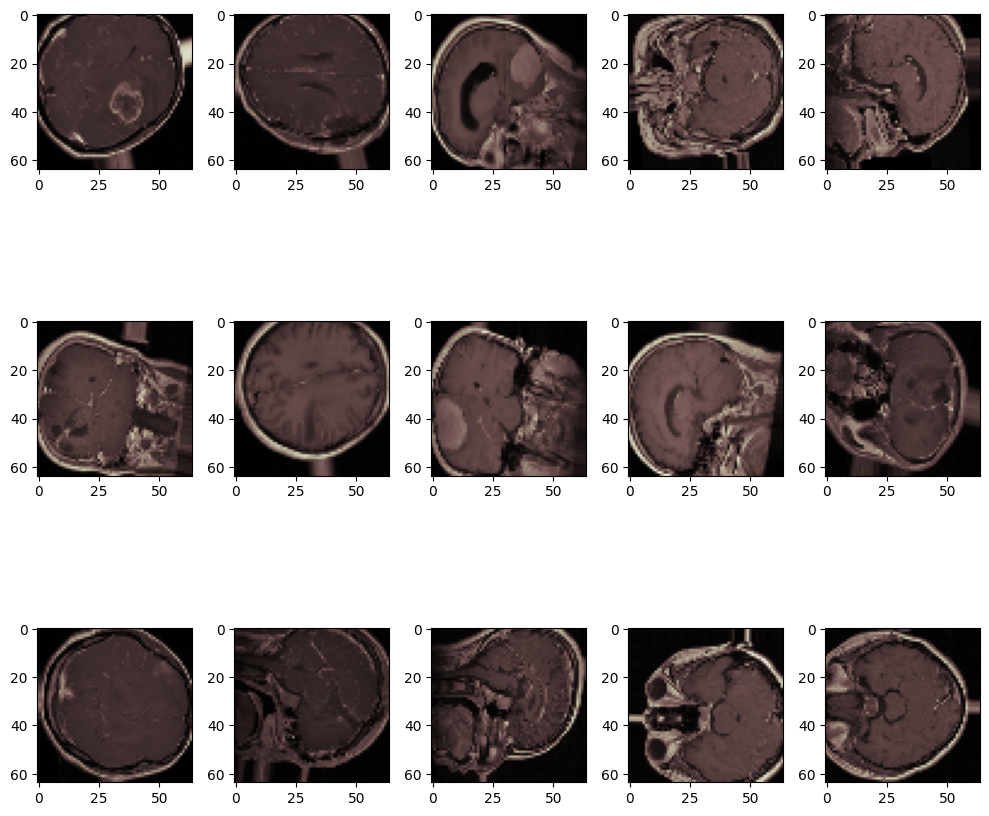

(614, 64, 64, 3)
(10535, 64, 64, 3)
(614, 3)
(10535, 3)


In [3]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 64
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [5]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2024-03-14 16:50:08.347224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 16:50:08.668982: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:41:00.0, compute capability: 8.9


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 FirstLayer (Conv2D)         (None, 56, 56, 64)        15616     
                                                                 
 primarycap_conv2d (Conv2D)  (None, 24, 24, 256)       1327360   
                                                                 
 primarycap_reshape (Reshape  (None, 18432, 8)         0         
 )                                                               
                                                                 
 primarycap_squash (Lambda)  (None, 18432, 8)          0         
                                                                 
 ThirdLayer (CapsuleLayer)   (None, 3, 1, 16)          7077888   
                                                             

In [6]:
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-CapsuleNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

Epoch 1/50


2024-03-14 16:50:14.870019: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-03-14 16:50:15.788664: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-14 16:50:15.788679: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-14 16:50:15.788719: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-14 16:50:16.205541: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


263/264 [============================>.] - ETA: 0s - loss: 1.0897 - accuracy: 0.3573
Epoch 1: saving model to model-ARM-Net.h5
Epoch 1: 11.24 seconds
264/264 [==============================] - 11s 30ms/step - loss: 1.0895 - accuracy: 0.3579 - val_loss: 1.0710 - val_accuracy: 0.3548 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0056 - accuracy: 0.4886
Epoch 2: saving model to model-ARM-Net.h5
Epoch 2: 7.77 seconds
264/264 [==============================] - 8s 29ms/step - loss: 1.0058 - accuracy: 0.4886 - val_loss: 1.0247 - val_accuracy: 0.5256 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.8944 - accuracy: 0.6143
Epoch 3: saving model to model-ARM-Net.h5
Epoch 3: 7.80 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.8944 - accuracy: 0.6144 - val_loss: 0.8473 - val_accuracy: 0.6385 - lr: 1.0000e-04
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 0.8341 - acc

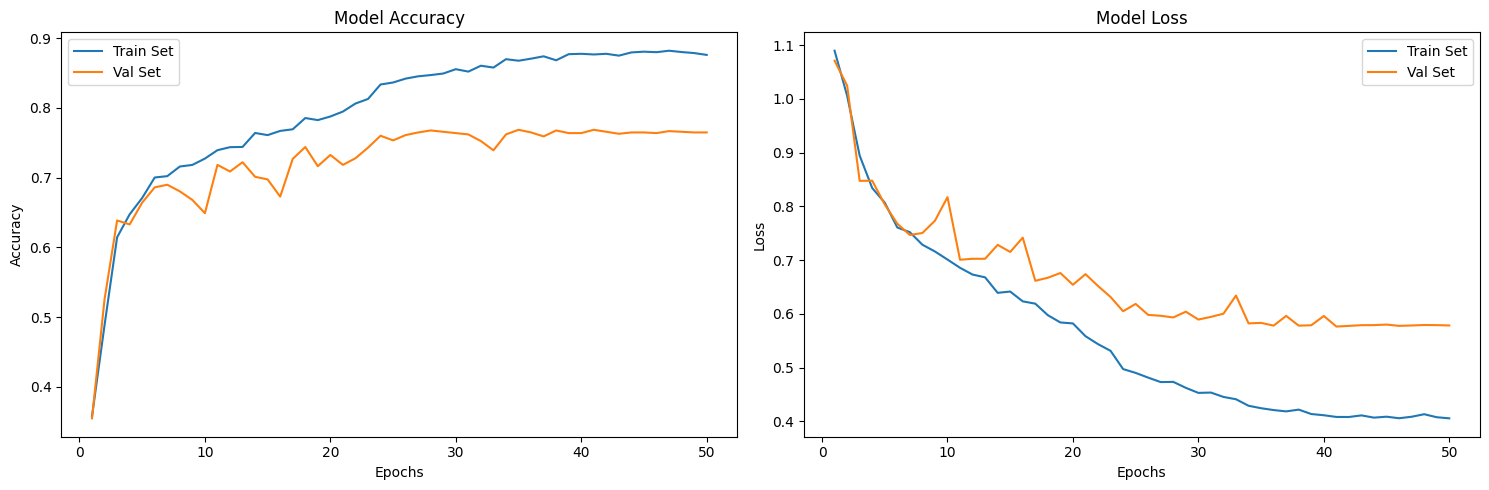

In [7]:
draw_curve(history)

20/20 [==============================] - 0s 11ms/step - loss: 0.4805 - accuracy: 0.8241
Test Accuracy:  82.41
              precision    recall  f1-score   support

      glioma     0.8964    0.7867    0.8380       286
  meningioma     0.6687    0.7676    0.7148       142
   pituitary     0.8600    0.9247    0.8912       186

    accuracy                         0.8241       614
   macro avg     0.8084    0.8264    0.8146       614
weighted avg     0.8327    0.8241    0.8256       614



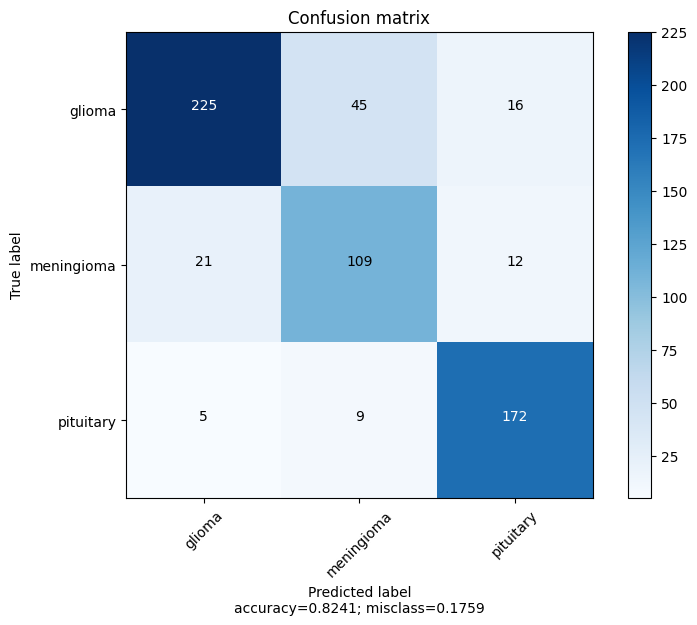

In [8]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

In [1]:
%reset -f

100%|██████████| 186/186 [00:00<00:00, 196.99it/s]


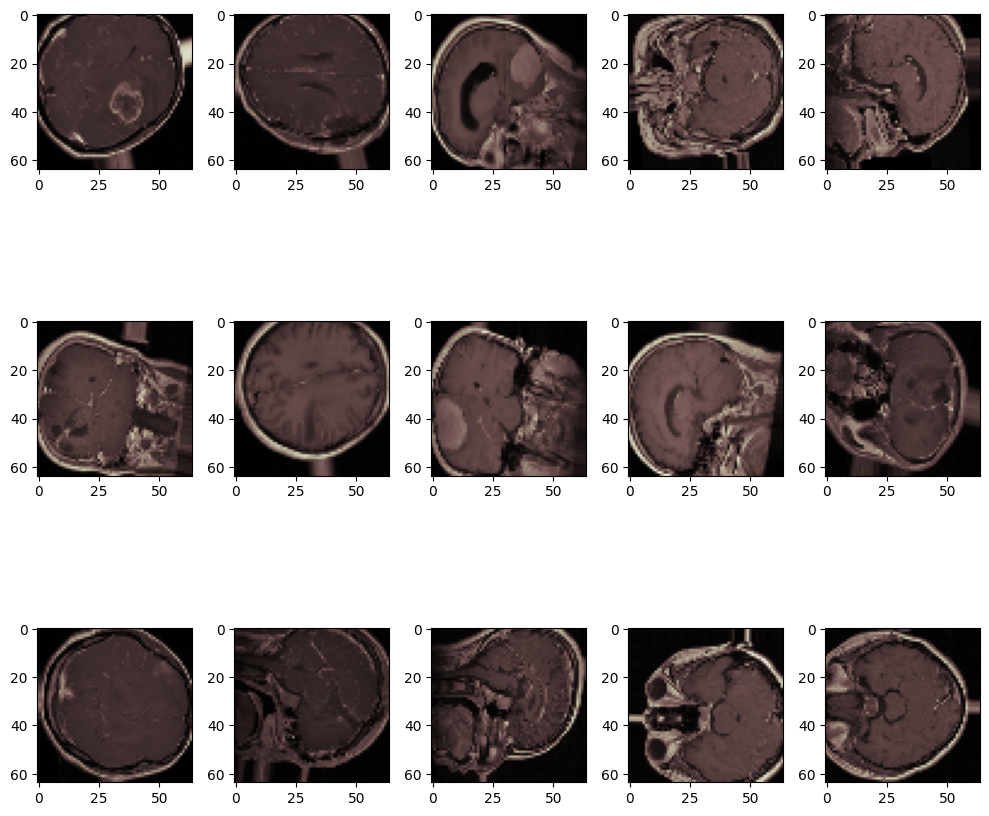

(614, 64, 64, 3)
(10535, 64, 64, 3)
(614, 3)
(10535, 3)


2024-03-14 16:59:52.195724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 16:59:52.596975: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:41:00.0, compute capability: 8.9


Epoch 1/50


2024-03-14 16:59:54.944668: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2024-03-14 16:59:55.788794: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-03-14 16:59:55.788808: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2024-03-14 16:59:55.788861: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-14 16:59:56.199362: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


263/264 [============================>.] - ETA: 0s - loss: 1.0909 - accuracy: 0.3482
Epoch 1: saving model to model-CapsuleNet.h5
Epoch 1: 11.07 seconds
264/264 [==============================] - 11s 30ms/step - loss: 1.0909 - accuracy: 0.3482 - val_loss: 1.0772 - val_accuracy: 0.3387 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.9961 - accuracy: 0.4963
Epoch 2: saving model to model-CapsuleNet.h5
Epoch 2: 7.75 seconds
264/264 [==============================] - 8s 29ms/step - loss: 0.9959 - accuracy: 0.4967 - val_loss: 0.9123 - val_accuracy: 0.5901 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.8637 - accuracy: 0.6246
Epoch 3: saving model to model-CapsuleNet.h5
Epoch 3: 7.74 seconds
264/264 [==============================] - 8s 29ms/step - loss: 0.8636 - accuracy: 0.6246 - val_loss: 0.8262 - val_accuracy: 0.6603 - lr: 1.0000e-04
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 0.8

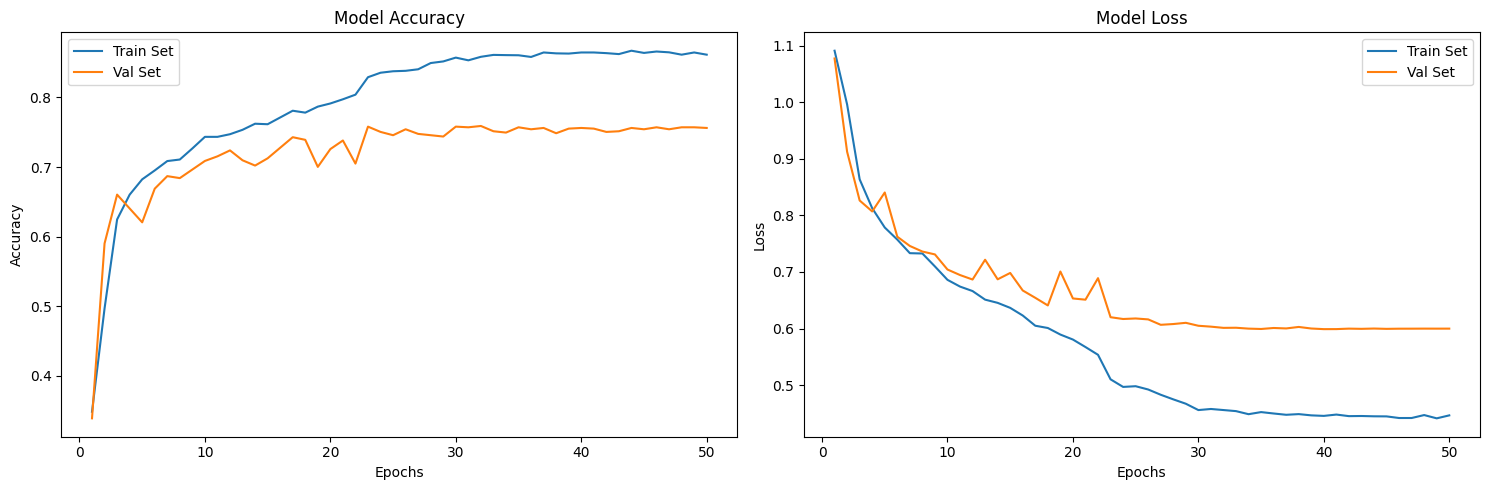

20/20 [==============================] - 0s 11ms/step - loss: 0.5244 - accuracy: 0.8013
Test Accuracy:  80.13
              precision    recall  f1-score   support

      glioma     0.8884    0.7797    0.8305       286
  meningioma     0.6622    0.6901    0.6759       142
   pituitary     0.7953    0.9194    0.8529       186

    accuracy                         0.8013       614
   macro avg     0.7820    0.7964    0.7864       614
weighted avg     0.8079    0.8013    0.8015       614



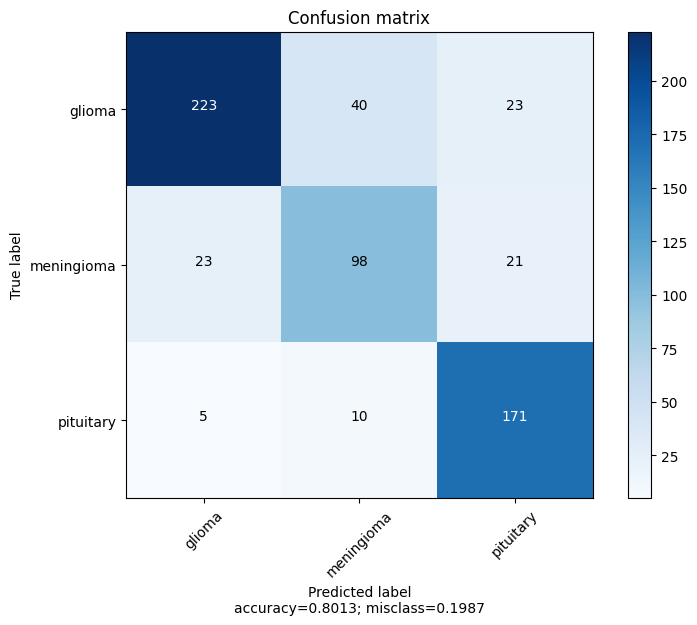

In [4]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 64
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-CapsuleNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

%reset -f

100%|██████████| 186/186 [00:00<00:00, 199.09it/s]


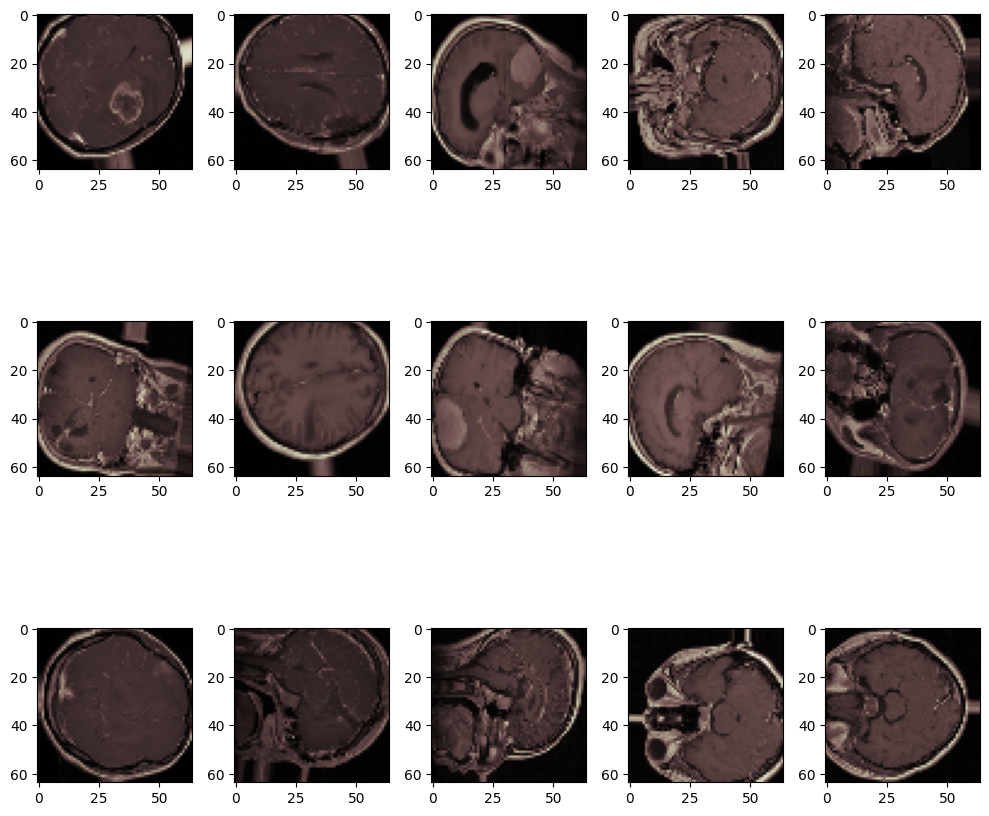

(614, 64, 64, 3)
(10535, 64, 64, 3)
(614, 3)
(10535, 3)
Epoch 1/50
262/264 [============================>.] - ETA: 0s - loss: 1.0821 - accuracy: 0.3645
Epoch 1: saving model to model-CapsuleNet.h5
Epoch 1: 8.75 seconds
264/264 [==============================] - 9s 30ms/step - loss: 1.0818 - accuracy: 0.3652 - val_loss: 1.0457 - val_accuracy: 0.4203 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.9816 - accuracy: 0.5280
Epoch 2: saving model to model-CapsuleNet.h5
Epoch 2: 7.73 seconds
264/264 [==============================] - 8s 29ms/step - loss: 0.9817 - accuracy: 0.5280 - val_loss: 0.9226 - val_accuracy: 0.5797 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.8851 - accuracy: 0.6149
Epoch 3: saving model to model-CapsuleNet.h5
Epoch 3: 7.81 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.8849 - accuracy: 0.6151 - val_loss: 0.8981 - val_accuracy: 0.6120 - lr: 1.0000e-04
Epoch 4/

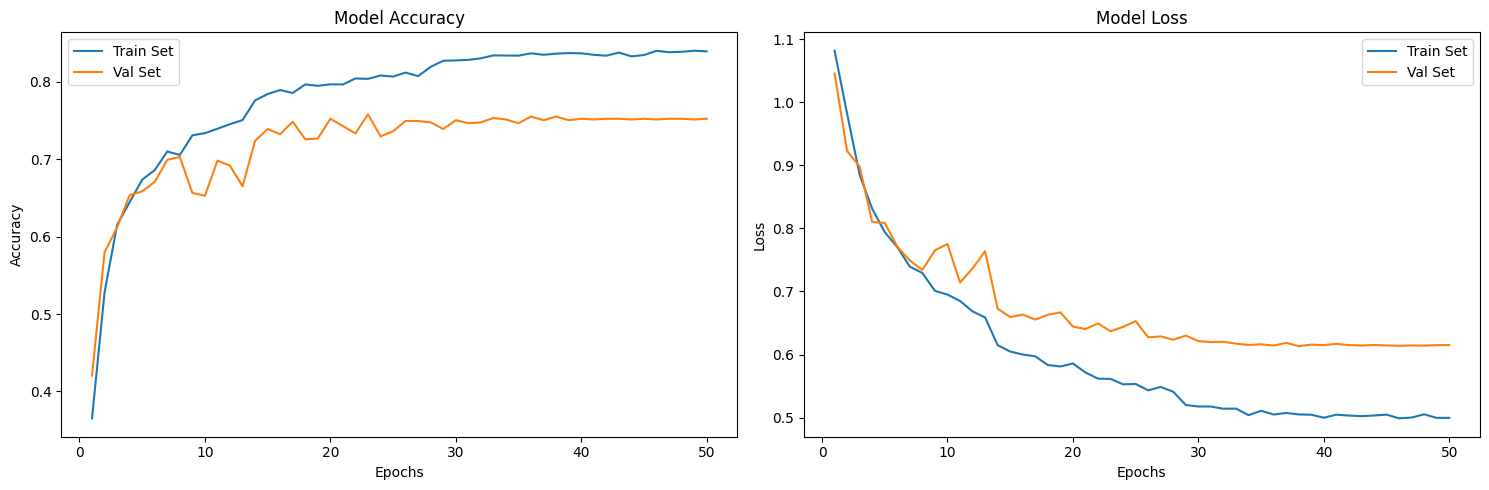

20/20 [==============================] - 0s 12ms/step - loss: 0.5522 - accuracy: 0.7899
Test Accuracy:  78.99
              precision    recall  f1-score   support

      glioma     0.8776    0.7517    0.8098       286
  meningioma     0.6533    0.6901    0.6712       142
   pituitary     0.7854    0.9247    0.8494       186

    accuracy                         0.7899       614
   macro avg     0.7721    0.7889    0.7768       614
weighted avg     0.7978    0.7899    0.7897       614



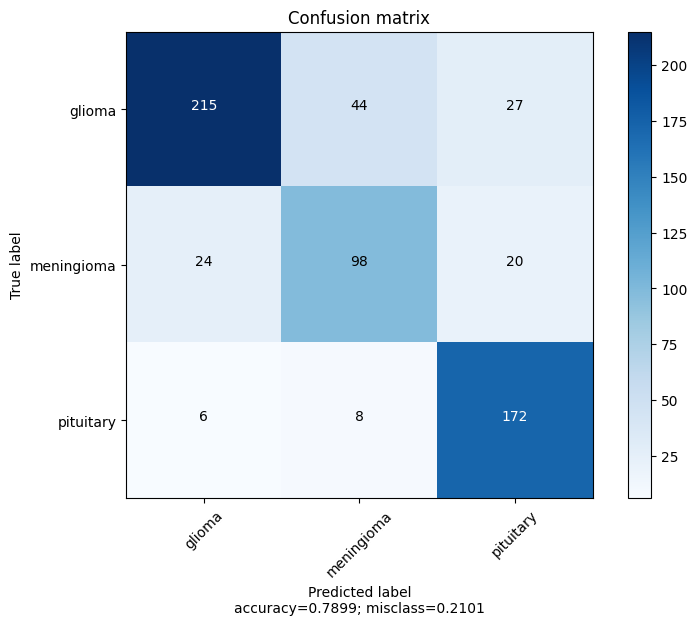

In [7]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 64
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-CapsuleNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

%reset -f

100%|██████████| 186/186 [00:00<00:00, 196.84it/s]


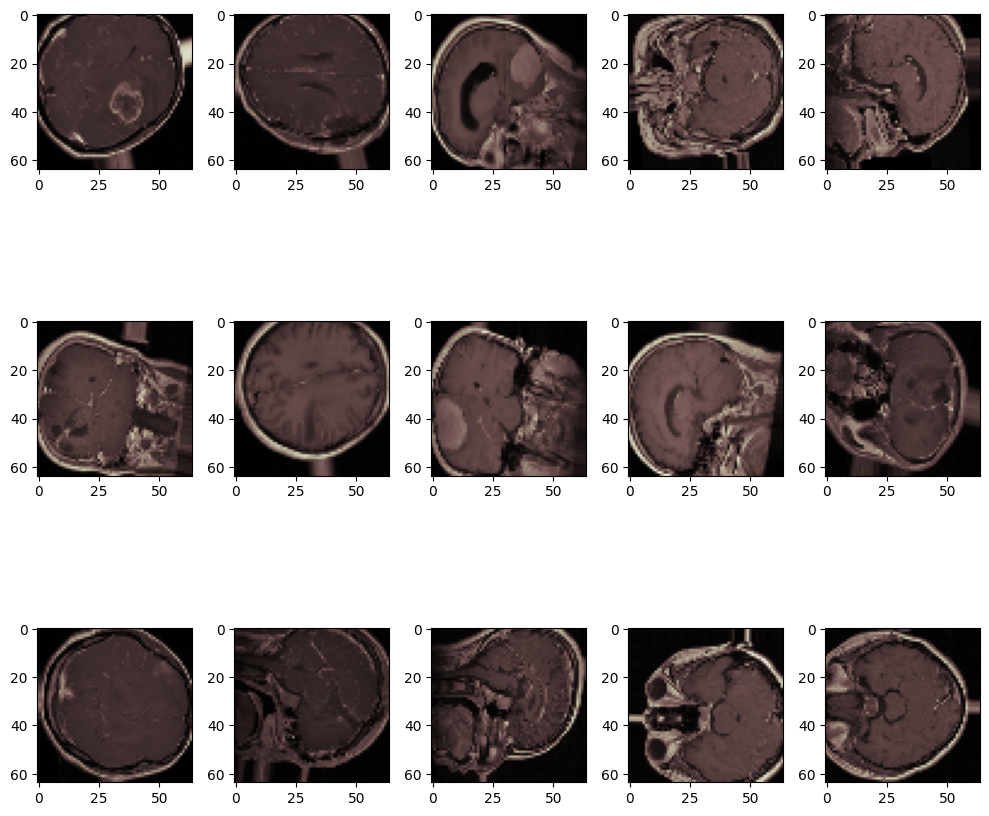

(614, 64, 64, 3)
(10535, 64, 64, 3)
(614, 3)
(10535, 3)
Epoch 1/50
262/264 [============================>.] - ETA: 0s - loss: 1.0862 - accuracy: 0.3493
Epoch 1: saving model to model-CapsuleNet.h5
Epoch 1: 8.69 seconds
264/264 [==============================] - 9s 30ms/step - loss: 1.0859 - accuracy: 0.3503 - val_loss: 1.0636 - val_accuracy: 0.3529 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0121 - accuracy: 0.4935
Epoch 2: saving model to model-CapsuleNet.h5
Epoch 2: 7.77 seconds
264/264 [==============================] - 8s 29ms/step - loss: 1.0120 - accuracy: 0.4933 - val_loss: 0.9901 - val_accuracy: 0.5218 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.8926 - accuracy: 0.6103
Epoch 3: saving model to model-CapsuleNet.h5
Epoch 3: 7.87 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.8926 - accuracy: 0.6102 - val_loss: 0.8350 - val_accuracy: 0.6537 - lr: 1.0000e-04
Epoch 4/

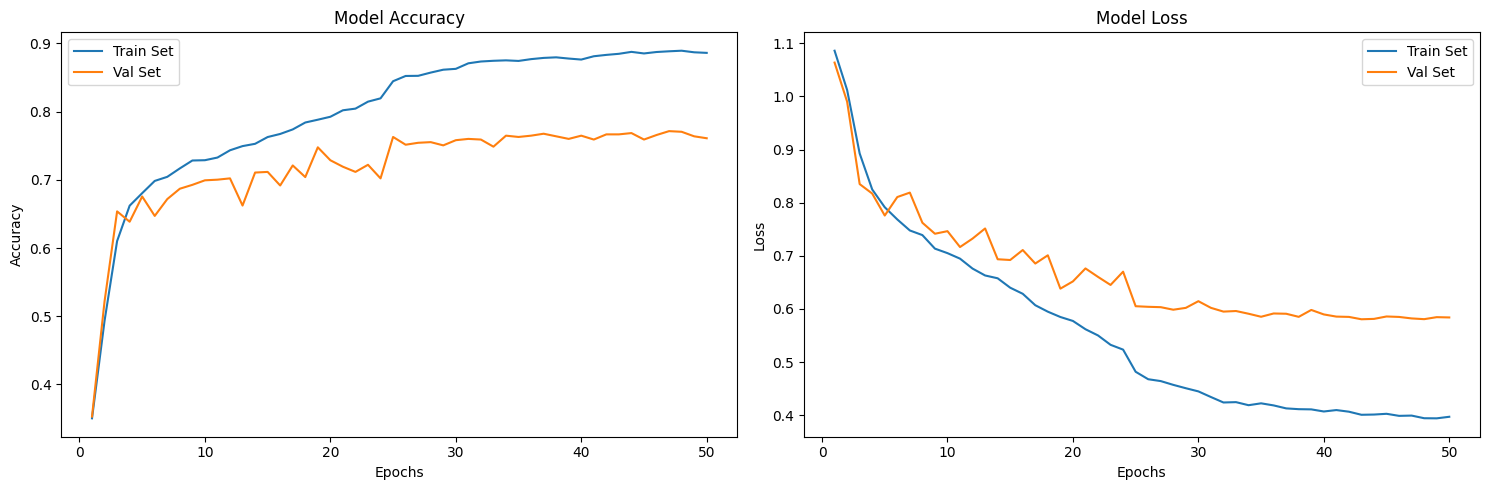

20/20 [==============================] - 0s 11ms/step - loss: 0.4832 - accuracy: 0.8127
Test Accuracy:  81.27
              precision    recall  f1-score   support

      glioma     0.8996    0.7832    0.8374       286
  meningioma     0.6603    0.7254    0.6913       142
   pituitary     0.8230    0.9247    0.8709       186

    accuracy                         0.8127       614
   macro avg     0.7943    0.8111    0.7998       614
weighted avg     0.8210    0.8127    0.8137       614



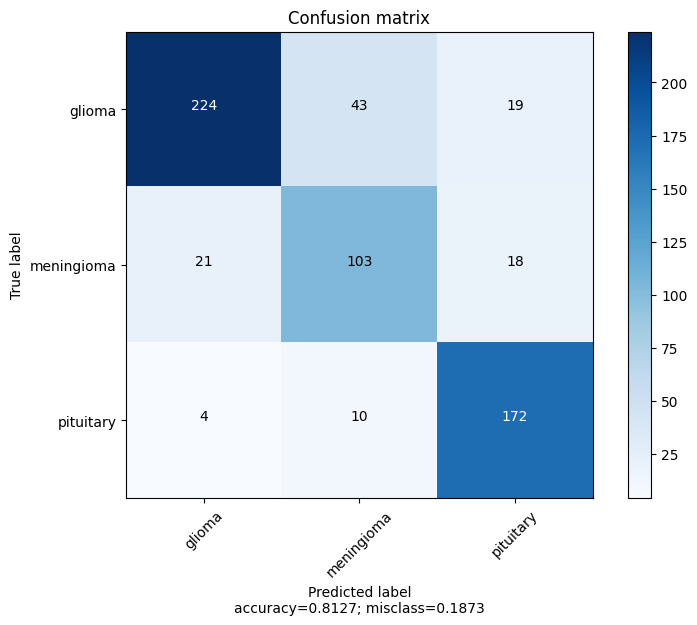

In [10]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 64
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-CapsuleNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

%reset -f

100%|██████████| 186/186 [00:00<00:00, 196.97it/s]


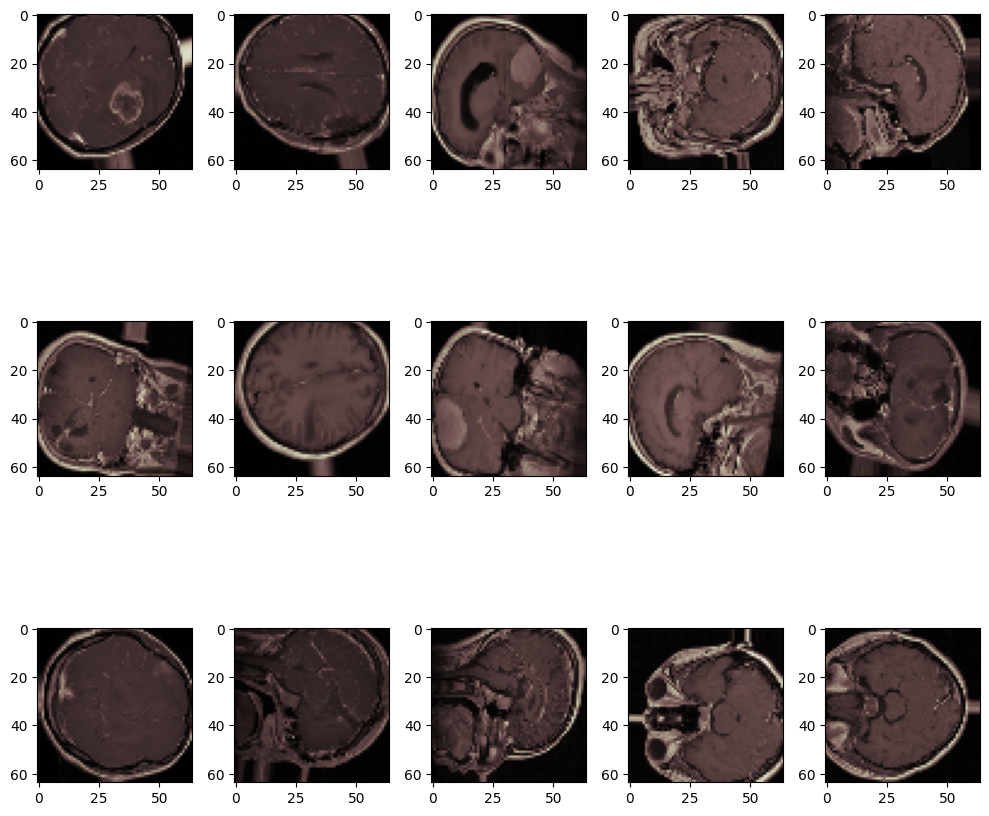

(614, 64, 64, 3)
(10535, 64, 64, 3)
(614, 3)
(10535, 3)
Epoch 1/50
263/264 [============================>.] - ETA: 0s - loss: 1.0866 - accuracy: 0.3450
Epoch 1: saving model to model-CapsuleNet.h5
Epoch 1: 8.65 seconds
264/264 [==============================] - 9s 30ms/step - loss: 1.0866 - accuracy: 0.3449 - val_loss: 1.0765 - val_accuracy: 0.3378 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 1.0191 - accuracy: 0.4863
Epoch 2: saving model to model-CapsuleNet.h5
Epoch 2: 7.89 seconds
264/264 [==============================] - 8s 30ms/step - loss: 1.0189 - accuracy: 0.4864 - val_loss: 0.9727 - val_accuracy: 0.5417 - lr: 1.0000e-04
Epoch 3/50
262/264 [============================>.] - ETA: 0s - loss: 0.8876 - accuracy: 0.6159
Epoch 3: saving model to model-CapsuleNet.h5
Epoch 3: 7.84 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.8878 - accuracy: 0.6152 - val_loss: 0.8489 - val_accuracy: 0.6357 - lr: 1.0000e-04
Epoch 4/

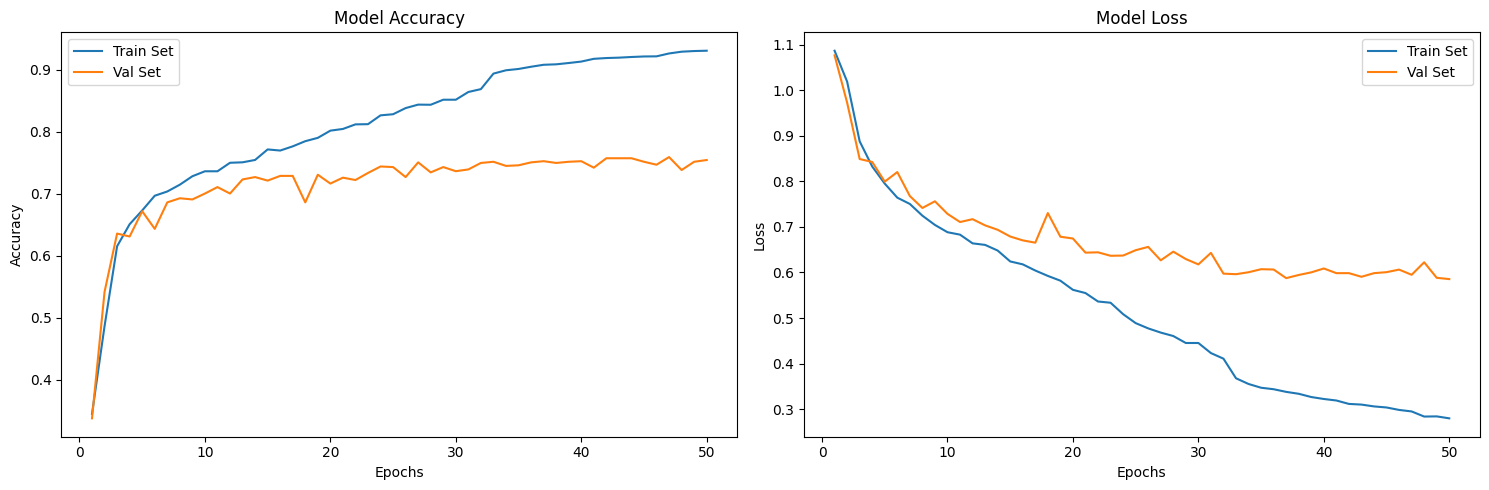

20/20 [==============================] - 0s 11ms/step - loss: 0.4490 - accuracy: 0.8176
Test Accuracy:  81.76
              precision    recall  f1-score   support

      glioma     0.8736    0.8217    0.8468       286
  meningioma     0.6667    0.7324    0.6980       142
   pituitary     0.8624    0.8763    0.8693       186

    accuracy                         0.8176       614
   macro avg     0.8009    0.8101    0.8047       614
weighted avg     0.8224    0.8176    0.8192       614



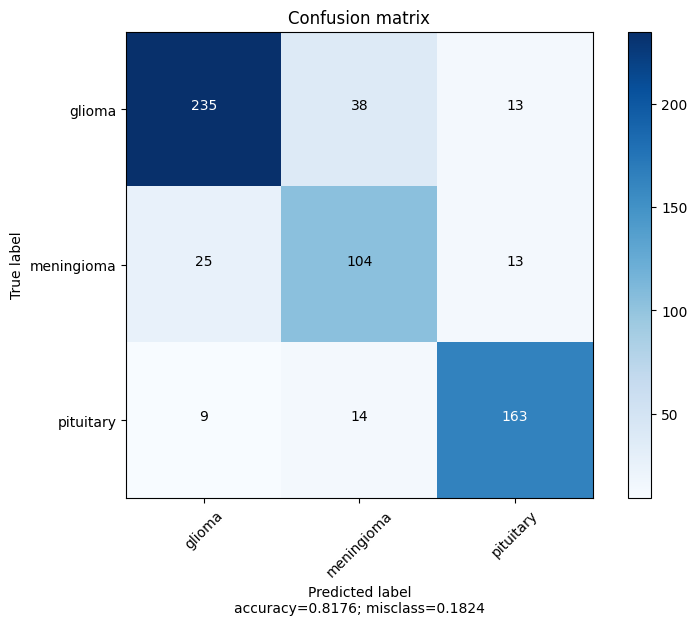

In [13]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 64
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-CapsuleNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

%reset -f